In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE_clean.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1,2012-06-01
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1,2012-06-02
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1,2012-06-03
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1,2012-06-04
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1,2012-06-05


In [4]:
df=df.drop("date",True)

In [5]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.035391,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


- FFMC --> large difference between the min value and 25% to max value
- DMC,DC,BUI,rain  --> large difference between the min value -75% and max value

 so there are major  outliers present in these features

In [6]:
def plot_dist(col,df):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 5))
    ax1 =sns.distplot(df[col],ax=ax1) 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}') 
    ax2 = sns.boxplot(data = df, x=col,ax=ax2);
    ax2.set_title(f'{col}') 
    ax2.set_xlabel(f'{col}')
    plt.figure(figsize=(30, 15))
    plt.show()

- **with respect to FFMC**

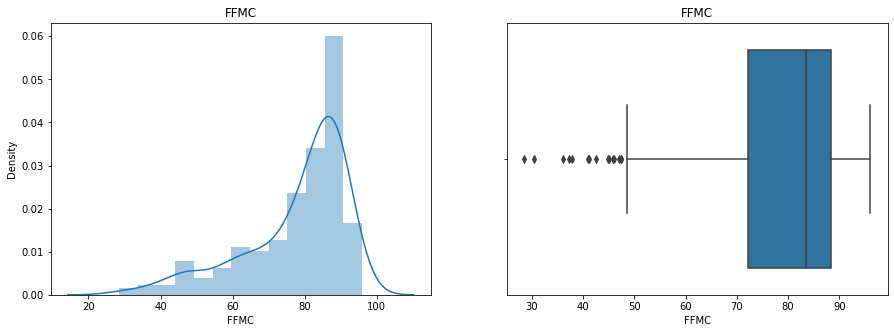

<Figure size 2160x1080 with 0 Axes>

In [7]:
plot_dist("FFMC",df)

In [8]:
#handeling the outliers with respect to FFMC 

In [9]:
# as in FFMC distriution is skewed we are using IQR method

In [10]:
q1=df["FFMC"].quantile(0.25)
q3=df["FFMC"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [11]:
lower_fence,upper_fence

(47.73750000000001, 112.63749999999999)

In [12]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [13]:
lower_extreme,upper_extreme

(23.40000000000002, 136.97499999999997)

In [14]:
df["FFMC"].describe()

count    244.000000
mean      77.887705
std       14.337571
min       28.600000
25%       72.075000
50%       83.500000
75%       88.300000
max       96.000000
Name: FFMC, dtype: float64

In [15]:
# theh upper range is not maching the max value .. we just need to remove outliers from lower side as  FFMC is left skewed

In [16]:
data=df.copy()
# making a copy of the data

In [17]:
data.loc[data["FFMC"]<=lower_fence,"FFMC"]=lower_fence

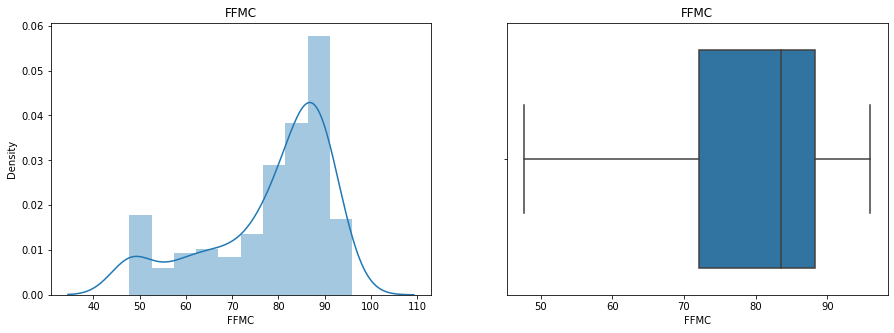

<Figure size 2160x1080 with 0 Axes>

In [18]:
plot_dist("FFMC",data)

- outliers are handeled in FFMC features

- **with respect to DMC**

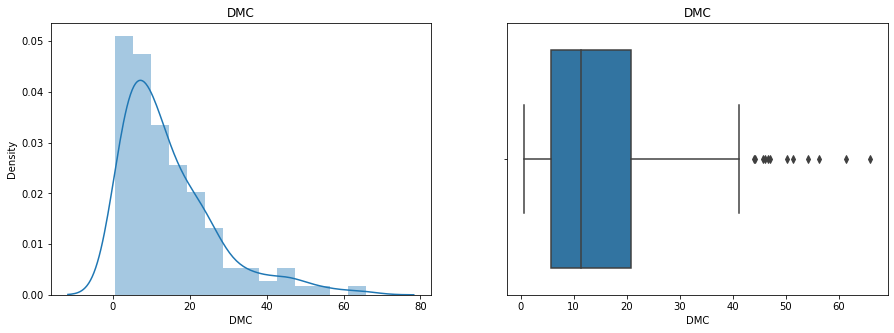

<Figure size 2160x1080 with 0 Axes>

In [19]:
plot_dist("DMC",df)

In [20]:
q1=df["DMC"].quantile(0.25)
q3=df["DMC"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [21]:
lower_fence,upper_fence

(-16.624999999999996, 43.175)

In [22]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [23]:
# extreme outliers
lower_extreme,upper_extreme

(-39.05, 65.6)

In [24]:
df["DMC"].describe()

count    244.000000
mean      14.673361
std       12.368039
min        0.700000
25%        5.800000
50%       11.300000
75%       20.750000
max       65.900000
Name: DMC, dtype: float64

In [25]:
data.loc[data["DMC"]>=upper_fence,"DMC"]=upper_fence

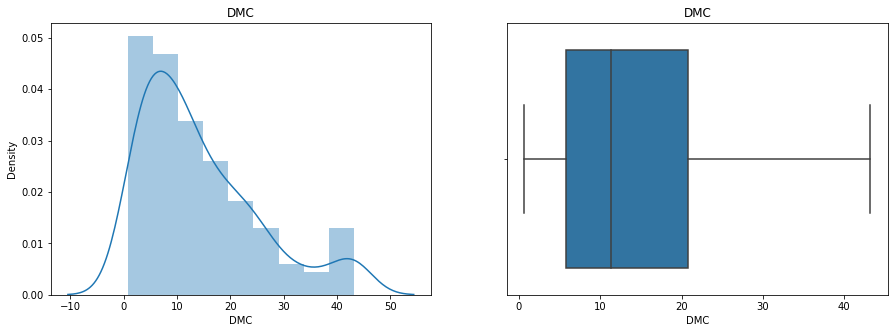

<Figure size 2160x1080 with 0 Axes>

In [26]:
plot_dist("DMC",data)

- **with respect to DC**

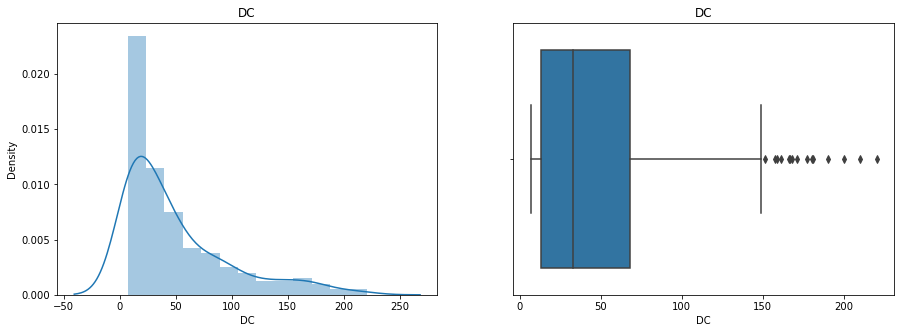

<Figure size 2160x1080 with 0 Axes>

In [27]:
plot_dist("DC",df)

In [28]:
q1=df["DC"].quantile(0.25)
q3=df["DC"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [29]:
lower_fence,upper_fence

(-69.03750000000002, 150.46250000000003)

In [30]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [31]:
# extreme values 
lower_extreme,upper_extreme

(-151.35000000000002, 232.77500000000003)

In [32]:
df["DC"].describe()

count    244.000000
mean      49.288484
std       47.619393
min        6.900000
25%       13.275000
50%       33.100000
75%       68.150000
max      220.400000
Name: DC, dtype: float64

In [33]:
data.loc[data["DC"]>=upper_fence,"DC"]=upper_fence

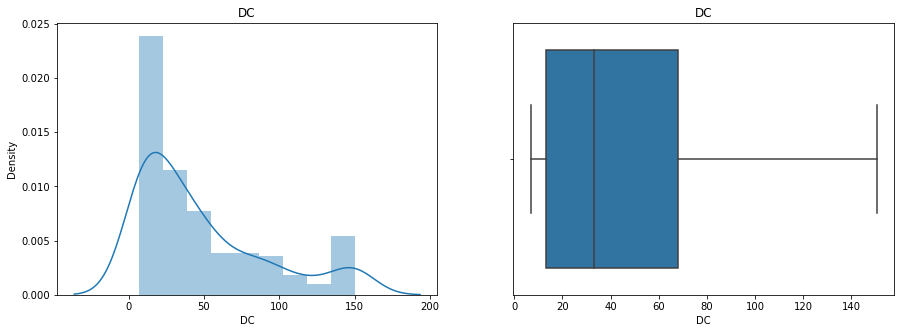

<Figure size 2160x1080 with 0 Axes>

In [34]:
plot_dist("DC",data)

- **with respect to BUI**

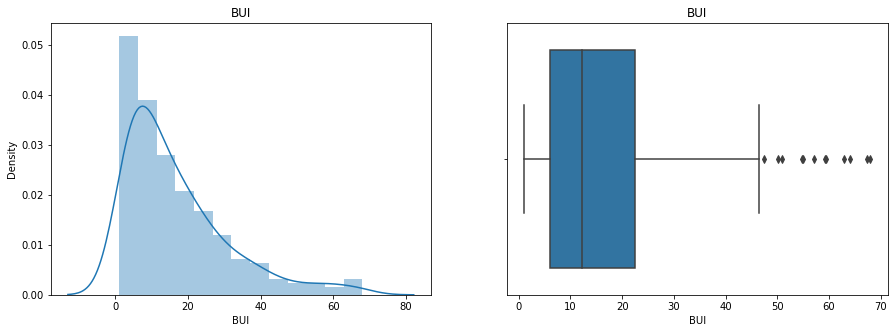

<Figure size 2160x1080 with 0 Axes>

In [35]:
plot_dist("BUI",df)

In [36]:
q1=df["BUI"].quantile(0.25)
q3=df["BUI"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [37]:
lower_fence,upper_fence

(-18.787499999999998, 47.3125)

In [38]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [39]:
# extreme values 
lower_extreme,upper_extreme

(-43.574999999999996, 72.1)

In [40]:
df["BUI"].describe()

count    244.000000
mean      16.664754
std       14.204824
min        1.100000
25%        6.000000
50%       12.250000
75%       22.525000
max       68.000000
Name: BUI, dtype: float64

In [41]:
data.loc[data["BUI"]>=upper_fence,"BUI"]=upper_fence

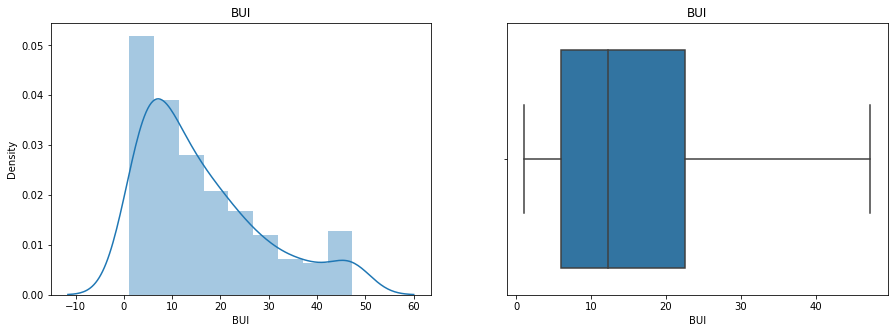

<Figure size 2160x1080 with 0 Axes>

In [42]:
plot_dist("BUI",data)

- **with respect to Rain**

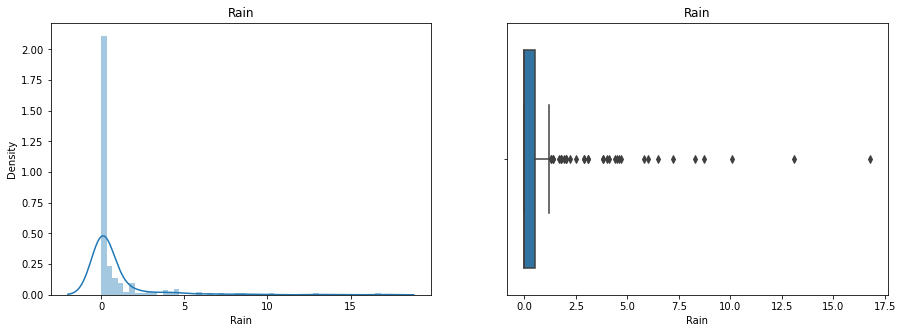

<Figure size 2160x1080 with 0 Axes>

In [43]:
plot_dist("Rain",df)

In [44]:
q1=df["Rain"].quantile(0.25)
q3=df["Rain"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [45]:
lower_fence,upper_fence

(-0.75, 1.25)

In [46]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [47]:
# extreme values 
lower_extreme,upper_extreme

(-1.5, 2.0)

In [48]:
df["Rain"].describe()

count    244.000000
mean       0.760656
std        1.999406
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max       16.800000
Name: Rain, dtype: float64

In [49]:
data.loc[data["Rain"]>=upper_extreme,"Rain"]=upper_extreme

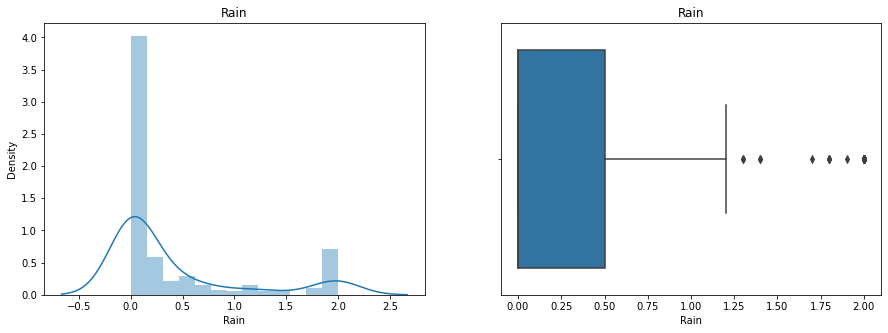

<Figure size 2160x1080 with 0 Axes>

In [50]:
plot_dist("Rain",data)

- **handling null values**

In [51]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            1
Classes        1
Region         0
dtype: int64

# using data with outliers handled 

#### spliting the data before performing any operation

In [52]:
from sklearn.model_selection import StratifiedShuffleSplit

##### spliting the data based on the region

In [53]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)
for train_index,test_index in split.split(data,data["Region"]):
    strat_train_set=data.loc[train_index]
    strat_test_set=data.loc[test_index]

In [54]:
strat_train_set["Region"].value_counts()

1    85
0    85
Name: Region, dtype: int64

In [55]:
strat_test_set["Region"].value_counts()

1    37
0    37
Name: Region, dtype: int64

In [56]:
x_train=strat_train_set.drop("Temperature",axis=1)

In [57]:
y_train=strat_train_set["Temperature"]

In [58]:
x_test=strat_test_set.drop("Temperature",axis=1)

In [59]:
y_test=strat_test_set["Temperature"]

### handeling null values in FWI (continious) and  in Region (discrete)

In [60]:
# for FWI   we are using median  to handel the null values
# for Region  we are filling the null values with the mode
median_FWI=x_train["FWI"].median()
mode_classes=str(x_train["Classes"].mode().values[0])

In [61]:
median_FWI,mode_classes

(4.0, 'fire')

In [62]:
x_train["FWI"].fillna(median_FWI,inplace=True)
x_train["Classes"].fillna(mode_classes,inplace=True)

In [63]:
x_test["FWI"].fillna(median_FWI,inplace=True)
x_test["Classes"].fillna(mode_classes,inplace=True)

### encoding the categorical data

##### with respect to classes we are dealing with nominal data with two categories .. so we are going to use one hot encoding

In [64]:
x_train.head()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
58,29,7,2012,73,15,0.0,86.6,26.7,127.0,5.6,35.0,11.9,fire,1
126,5,6,2012,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,0
144,23,6,2012,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0.8,not fire,0
202,20,8,2012,81,15,0.0,83.7,34.4,107.0,3.8,38.1,9.0,fire,0
20,21,6,2012,78,14,0.0,81.0,6.3,31.6,2.6,8.4,2.2,fire,1


In [65]:
x_train["Classes"]=pd.get_dummies(x_train["Classes"],drop_first=True)
x_test["Classes"]=pd.get_dummies(x_test["Classes"],drop_first=True)

In [66]:
x_train.head()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
58,29,7,2012,73,15,0.0,86.6,26.7,127.0,5.6,35.0,11.9,0,1
126,5,6,2012,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,1,0
144,23,6,2012,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0.8,1,0
202,20,8,2012,81,15,0.0,83.7,34.4,107.0,3.8,38.1,9.0,0,0
20,21,6,2012,78,14,0.0,81.0,6.3,31.6,2.6,8.4,2.2,0,1


### Feature selection

##### Drop Constant Features Using Variance Threshold

In [67]:
### It will remove  zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(x_train) # you ave to do fit on x_train

VarianceThreshold(threshold=0)

In [68]:
var_thres.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [69]:
sum(var_thres.get_support())

13

In [70]:
constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[var_thres.get_support()]]

print(len(constant_columns))

1


In [71]:
for column in constant_columns:
    print(column)

year


In [72]:
x_train=x_train.drop(constant_columns,axis=1)

In [73]:
x_test=x_test.drop(constant_columns,axis=1)

In [74]:
x_train.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
58,29,7,73,15,0.0,86.6,26.7,127.0,5.6,35.0,11.9,0,1
126,5,6,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,1,0
144,23,6,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0.8,1,0
202,20,8,81,15,0.0,83.7,34.4,107.0,3.8,38.1,9.0,0,0
20,21,6,78,14,0.0,81.0,6.3,31.6,2.6,8.4,2.2,0,1


In [75]:
x_test.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
108,17,9,52,14,0.0,87.7000,6.400,24.3,6.2,7.7,5.9,0,1
40,11,7,76,14,0.0,81.1000,8.100,18.7,2.6,8.1,2.2,1,1
0,1,6,57,18,0.0,65.7000,3.400,7.6,1.3,3.4,0.5,1,1
214,1,9,86,16,0.0,47.7375,0.900,8.2,0.1,1.4,0.0,1,0
173,22,7,48,18,0.0,91.5000,43.175,90.1,13.2,44.0,25.4,0,0


##### pearson correlation

In [76]:
# if two  features are highly correlated ( not w.r.t target i m saying ) .then we can drop one of the feature as it is doing the same thing , for that we specify some threshold value

In [77]:
# taking a threshold value --> given by domain expert
# the time being we are taking threshold =0.95

In [78]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [79]:
# giving threshold 60 percent for the time 
threshold=0.95

In [80]:
correlation(x_train.iloc[:,:-1],threshold)

{'BUI'}

In [81]:
# so we are going to drop it

In [82]:
x_train=x_train.drop('BUI',axis=1)
x_test=x_test.drop('BUI',axis=1)

##### information gain

In [83]:
# from sklearn.feature_selection import mutual_info_classif # for classification
from sklearn.feature_selection import mutual_info_regression # for regression problem


In [84]:
mutual_info=mutual_info_regression(x_train,y_train)

In [85]:
mutual_data=pd.Series(mutual_info,index=x_train.columns)

In [86]:
mutual_data.sort_values(ascending=False)

ISI        0.416145
FFMC       0.365871
DMC        0.293658
RH         0.261246
FWI        0.261046
DC         0.250269
month      0.244396
Classes    0.135424
Ws         0.124329
Rain       0.069886
Region     0.068350
day        0.061076
dtype: float64

In [87]:
# we do feature  selection w.r.t our training data only then remove from train and test.. to avoid overfitting

##### feature Importance

In [88]:
# This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [89]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x_train,y_train)

ExtraTreesClassifier()

In [90]:
print(model.feature_importances_)

[0.10087368 0.07090641 0.10918719 0.08774874 0.07084423 0.09664111
 0.10952574 0.10297281 0.10648317 0.08583669 0.01826389 0.04071633]


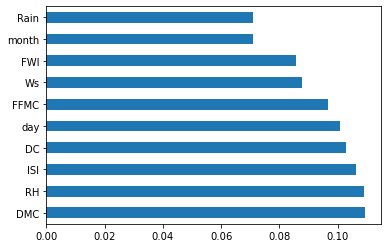

In [91]:
ranked_features=pd.Series(model.feature_importances_,index=x_train.columns)
ranked_features.nlargest(10).plot(kind="barh")
plt.show()

In [92]:
# these are the important features for our model so we are sticking to them 

In [93]:
x_train.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Classes,Region
58,29,7,73,15,0.0,86.6,26.7,127.0,5.6,11.9,0,1
126,5,6,60,14,0.2,77.1,6.0,17.6,1.8,0.9,1,0
144,23,6,59,16,0.8,74.2,7.0,8.3,1.6,0.8,1,0
202,20,8,81,15,0.0,83.7,34.4,107.0,3.8,9.0,0,0
20,21,6,78,14,0.0,81.0,6.3,31.6,2.6,2.2,0,1


In [94]:
y_train.head()

58     32
126    32
144    33
202    36
20     30
Name: Temperature, dtype: int64

In [95]:
x_test.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Classes,Region
108,17,9,52,14,0.0,87.7000,6.400,24.3,6.2,5.9,0,1
40,11,7,76,14,0.0,81.1000,8.100,18.7,2.6,2.2,1,1
0,1,6,57,18,0.0,65.7000,3.400,7.6,1.3,0.5,1,1
214,1,9,86,16,0.0,47.7375,0.900,8.2,0.1,0.0,1,0
173,22,7,48,18,0.0,91.5000,43.175,90.1,13.2,25.4,0,0


In [96]:
y_test.head()

108    31
40     33
0      29
214    29
173    32
Name: Temperature, dtype: int64

## Temp vs independent feature

- ***Plot data and a linear regression model fit.***

In [97]:
continues_features=[feature for feature in x_train.columns if len(x_train[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['day', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'FWI']


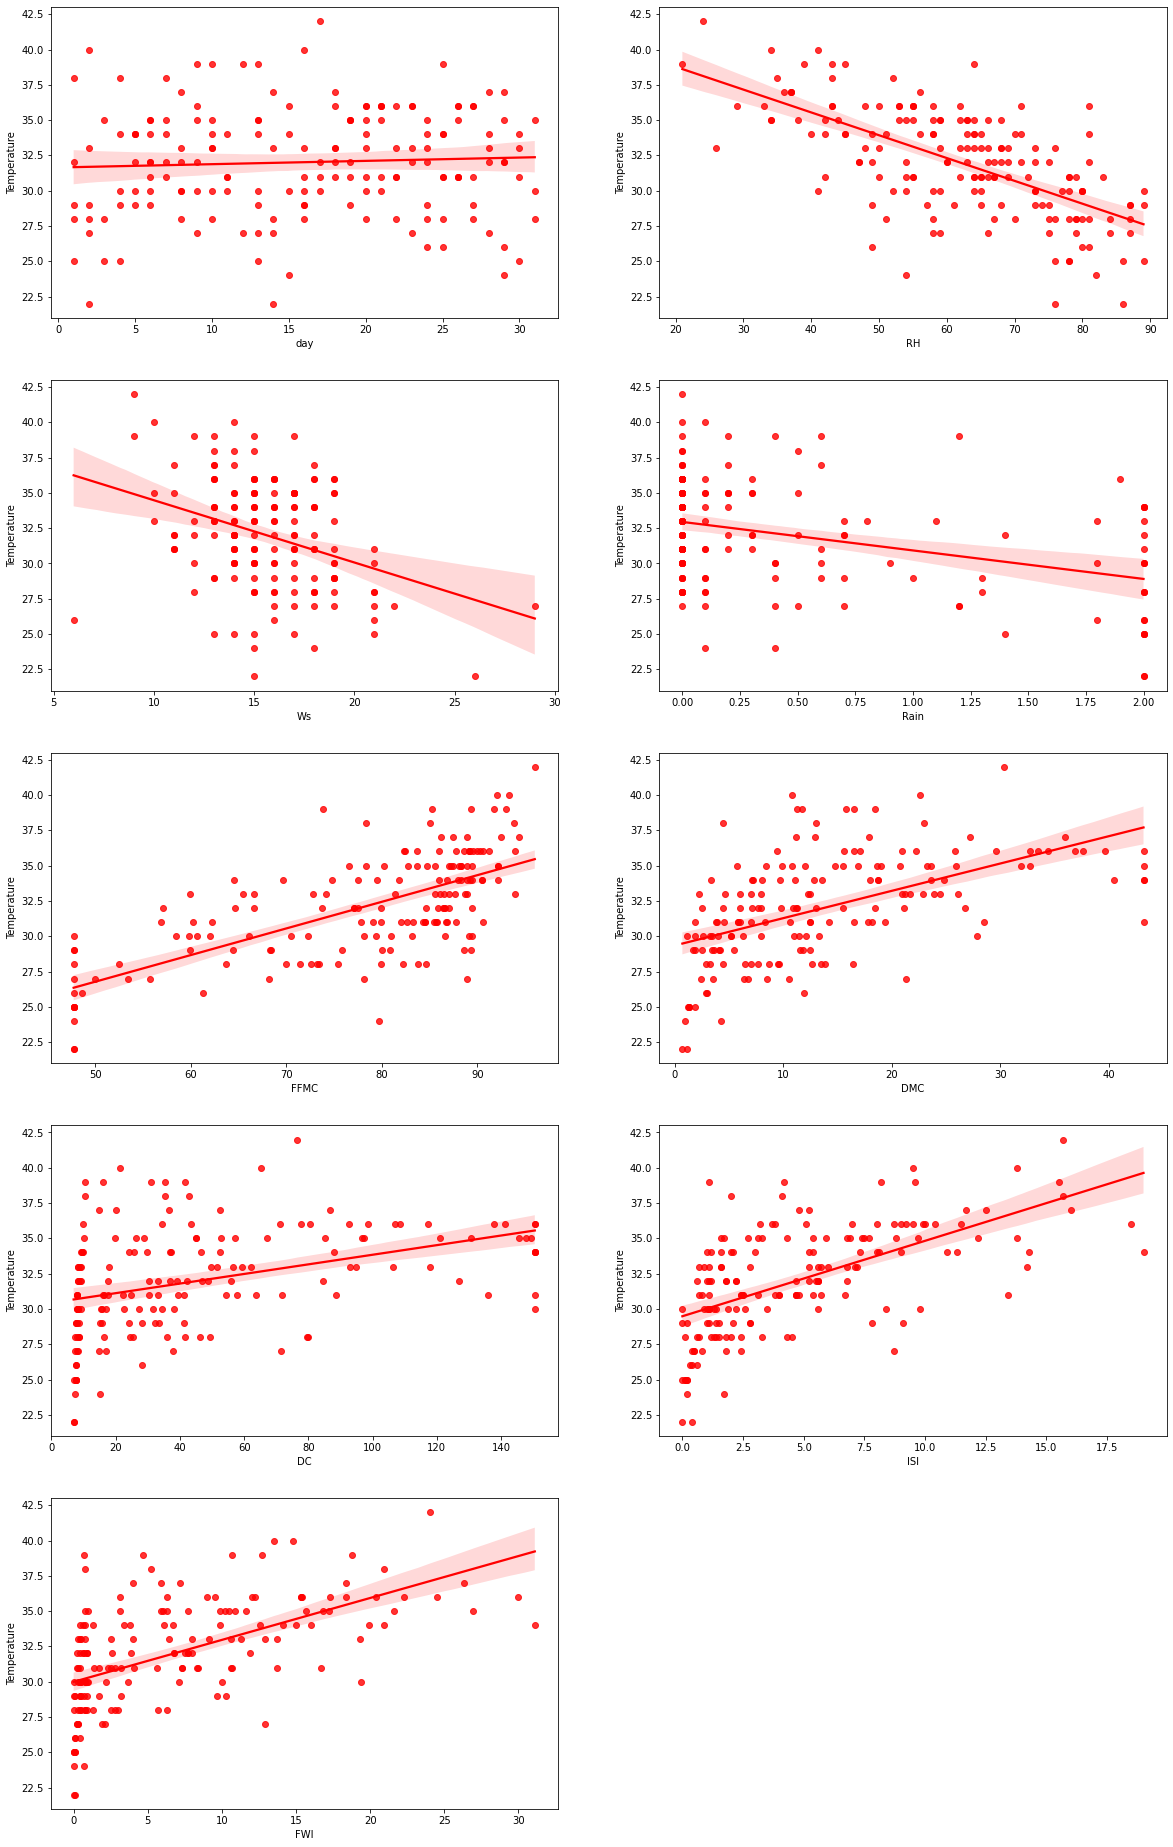

In [98]:
count=1
plt.subplots(figsize=(20, 40))
for col in continues_features:
    plt.subplot(6,2,count)
    sns.regplot(data=x_train,x=col,y=y_train,color="red")
    count+=1

plt.show()

In [99]:
# temp and days are not much correlated we are going to drop days

In [100]:
x_train=x_train.drop("day",axis=1)
x_test=x_test.drop("day",axis=1)

## standardize the datasets

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.

z=(x-x_mean)/std

In [101]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
s_x_train=scaler.fit_transform(x_train)
s_x_test=scaler.transform(x_test)

## model Training

# linear regression

In [102]:
# this is multiple linear regression Problem
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
# training the training data
regression.fit(s_x_train,y_train)

LinearRegression()

In [103]:
# print the cofficient and the intercept
print(regression.coef_)
# toal cofficient = number of features 

[-0.41452102 -1.0423676  -0.78536895  0.23719523  1.07184166  0.77503
  0.14463653  0.48362296 -0.53638535 -0.2706922  -0.18627646]


In [104]:
print(regression.intercept_)
# intercept =1

32.01764705882353


In [105]:
# prediction for test data
y_pred1=regression.predict(s_x_test)

In [106]:
y_pred1

array([32.85962373, 30.85514878, 29.86012587, 25.96722013, 35.77002161,
       35.37718034, 34.10983827, 31.48784079, 30.78508849, 34.34036951,
       34.5213419 , 35.7947362 , 32.65940746, 30.74589498, 30.73735613,
       34.36032039, 33.6397358 , 34.98501513, 28.45979778, 33.92082922,
       34.2286868 , 28.87336997, 36.57179725, 31.17245744, 34.34045443,
       28.31751527, 33.45311932, 33.10722859, 31.80015299, 32.15181236,
       27.6350022 , 28.5386987 , 33.01894671, 28.92368255, 33.80050063,
       29.67728035, 31.59999191, 33.17009581, 32.10998313, 32.19346059,
       27.59277569, 32.61086141, 36.5023321 , 36.5715743 , 29.12650204,
       33.77876572, 30.10240606, 35.64495235, 32.83579807, 30.24212123,
       35.06110529, 30.43894415, 36.09372091, 35.87930333, 34.80511287,
       32.5090675 , 30.23255257, 33.76951883, 34.0725493 , 27.83353921,
       34.33759798, 26.19666305, 28.68764622, 35.91280084, 32.05833802,
       31.42019563, 32.12656025, 34.68927754, 32.69481488, 29.63

Text(0, 0.5, 'Test pred data')

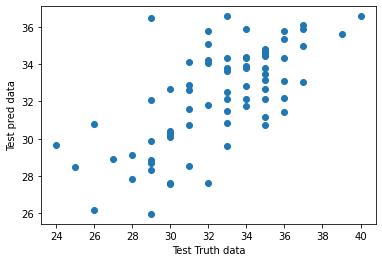

In [107]:
plt.scatter(y_test,y_pred1)
plt.xlabel("Test Truth data")
plt.ylabel("Test pred data")

- w.r.t your truth point and predicted point if you are getting some linear replationship then your model is good

In [108]:
# residuals
residuals=y_test-y_pred1

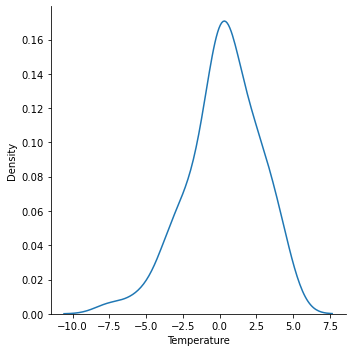

In [109]:
sns.displot(residuals,kind="kde")

- the residual (error) should follows a normal/gaussian distribution

In [110]:

# scatter plot with prediction and residual
#uniform distributiion

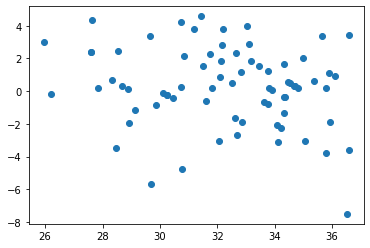

In [111]:
plt.scatter(y_pred1,residuals)

##### performance matrix

In [112]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("mean_absolute_error",mean_absolute_error(y_test,y_pred1))
print("(mean_squared_error",mean_squared_error(y_test,y_pred1))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,y_pred1)))

mean_absolute_error 1.8678339711375114
(mean_squared_error 5.899093149546576
root mean squared error 2.4288048809129514


##### r squared and adjusted R squared

In [113]:
# r squared
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred1)
print(score)

0.43778070405839065


In [114]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.3380321192945567

# Ridge regression

In [115]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(s_x_train,y_train)

Ridge()

In [116]:
y_pred2 = ridge.predict(s_x_test)

In [117]:
y_pred2

array([32.85632969, 30.84495187, 29.87460645, 26.0449299 , 35.77898232,
       35.37983869, 34.08143955, 31.43304701, 30.78786864, 34.3436517 ,
       34.53299728, 35.85917713, 32.67058759, 30.73416471, 30.72518765,
       34.35416506, 33.64614487, 34.98151435, 28.46739949, 33.9255898 ,
       34.24043666, 28.90221263, 36.64979428, 31.09776311, 34.29963561,
       28.34229107, 33.42446277, 33.12916215, 31.80017136, 32.13692916,
       27.65009583, 28.54968948, 33.03896503, 28.94538256, 33.80498056,
       29.70909377, 31.61885329, 33.13739957, 32.1042738 , 32.18561007,
       27.60566055, 32.60501135, 36.45995967, 36.57467677, 29.148378  ,
       33.77313299, 30.12693243, 35.63740434, 32.84665408, 30.26831395,
       35.0507297 , 30.45160389, 36.09761665, 35.86388408, 34.79112878,
       32.50719263, 30.24935775, 33.74949388, 34.07996305, 27.83868729,
       34.3284124 , 26.21011366, 28.71049607, 35.92397561, 32.05384047,
       31.41128819, 32.1212173 , 34.76080471, 32.69883429, 29.63

Text(0, 0.5, 'Test pred data')

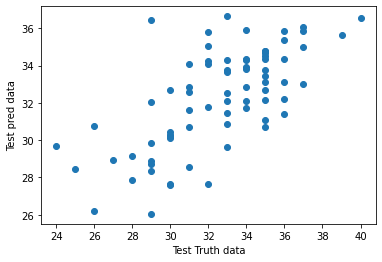

In [118]:
plt.scatter(y_test,y_pred2)
plt.xlabel("Test Truth data")
plt.ylabel("Test pred data")

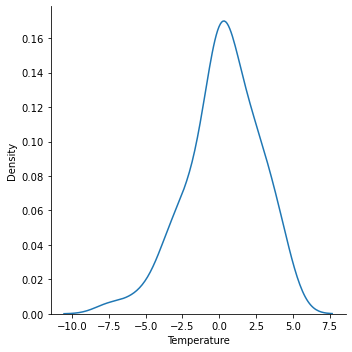

In [119]:
# residuals
residuals=y_test-y_pred2
sns.displot(residuals,kind="kde")

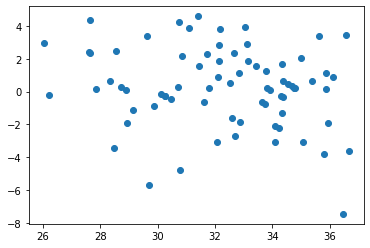

In [120]:
# scatter plot with prediction and residual
#uniform distributiion
plt.scatter(y_pred2,residuals)

#### performance matrix

In [121]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("mean_absolute_error",mean_absolute_error(y_test,y_pred2))
print("(mean_squared_error",mean_squared_error(y_test,y_pred2))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,y_pred2)))

mean_absolute_error 1.8699977324167996
(mean_squared_error 5.909695032053565
root mean squared error 2.4309864318941736


#### r squared and adjusted R squared

In [122]:
# r squared
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred2)
print(score)

0.43677028046146993


In [123]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.3368424269949565

# Lasso Regression

In [124]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(s_x_train,y_train)
y_pred3 = lasso.predict(s_x_test)

In [125]:
y_pred3

array([33.29613802, 31.59024609, 31.28509332, 28.422071  , 33.79719305,
       33.88082346, 32.33296213, 31.60126623, 31.57802315, 33.19645282,
       33.20448022, 33.46303513, 32.31942467, 32.08998661, 31.15760579,
       33.03422667, 33.03506578, 33.2775659 , 28.73847837, 33.35149069,
       33.42541548, 28.79335563, 34.39242322, 31.20996572, 33.14398119,
       30.19143716, 32.98726511, 33.33459679, 32.30037714, 32.37047008,
       30.1453147 , 30.91211293, 33.42457637, 30.23277696, 32.98522318,
       31.07050724, 32.03510935, 32.83138813, 32.22944509, 32.92472415,
       29.71818446, 32.32745207, 33.53013534, 34.84699209, 29.75627952,
       32.8534284 , 31.47019885, 34.70884813, 32.85930217, 31.11458777,
       33.26151111, 31.58473603, 34.22133056, 33.39162767, 33.00043887,
       32.46559603, 29.69829782, 32.83558368, 33.02871661, 28.84954741,
       33.23826803, 28.61808496, 29.95433541, 34.07348098, 32.02073278,
       32.25305187, 32.24633899, 33.6848095 , 32.47446254, 31.41

Text(0, 0.5, 'Test pred data')

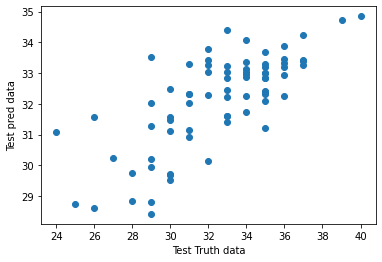

In [126]:
plt.scatter(y_test,y_pred3)
plt.xlabel("Test Truth data")
plt.ylabel("Test pred data")

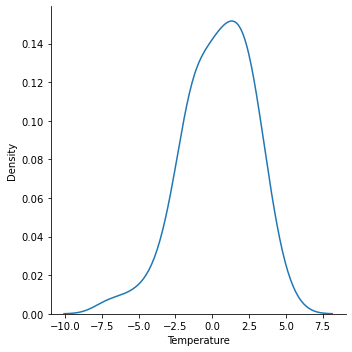

In [127]:
# residuals
residuals=y_test-y_pred3
sns.displot(residuals,kind="kde")

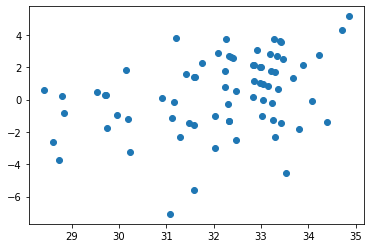

In [128]:
# scatter plot with prediction and residual
#uniform distributiion
plt.scatter(y_pred3,residuals)

#### performance matrix

In [129]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("mean_absolute_error",mean_absolute_error(y_test,y_pred3))
print("(mean_squared_error",mean_squared_error(y_test,y_pred3))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,y_pred3)))

mean_absolute_error 1.9360434999901024
(mean_squared_error 5.676822715342798
root mean squared error 2.3826083848049384


#### r squared and adjusted R squared

In [130]:
# r squared
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred3)
print(score)

0.45896442227723055


In [131]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.3629742391328682

# Elastic Net Regularization

In [132]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet()
enet.fit(s_x_train,y_train)
y_pred4 = enet.predict(s_x_test)

Text(0, 0.5, 'Test pred data')

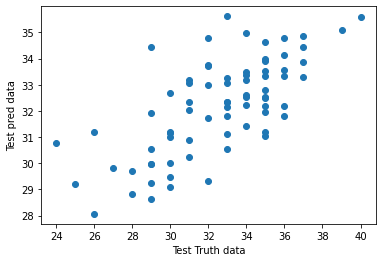

In [133]:
plt.scatter(y_test,y_pred4)
plt.xlabel("Test Truth data")
plt.ylabel("Test pred data")

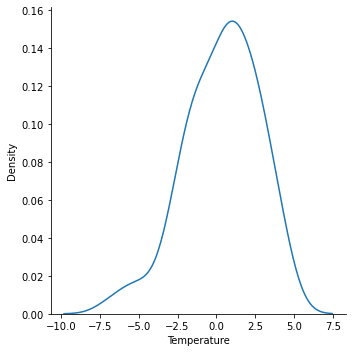

In [134]:
# residuals
residuals=y_test-y_pred4
sns.displot(residuals,kind="kde")

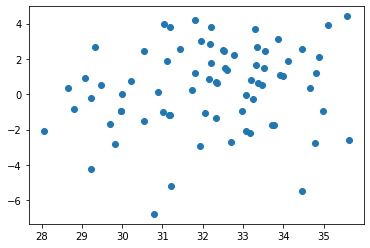

In [135]:
# scatter plot with prediction and residual
#uniform distributiion
plt.scatter(y_pred4,residuals)

#### performance matrix

In [136]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("mean_absolute_error",mean_absolute_error(y_test,y_pred4))
print("(mean_squared_error",mean_squared_error(y_test,y_pred4))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,y_pred4)))

mean_absolute_error 1.952711785309274
(mean_squared_error 5.716880446647195
root mean squared error 2.390999884284229


##### r squared and adjusted R squared

In [137]:
# r squared
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred4)
print(score)

0.45514667793584695


In [138]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.3584791530534972